In [237]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [238]:
base_path = os.getcwd()
df_2n3d = pd.read_csv(base_path+'/crawled_csv/car_2n3d.csv', names=['car_name', 'price', 'delete', 'oiltype', 'num_seat', 'rent_date', 'rent_day', 'return_date', 'return_day', 'reserve_avail', 'rent_period', 'img_url'])
df_3n4d = pd.read_csv(base_path+'/crawled_csv/car_3n4d.csv', names=['car_name', 'price', 'delete', 'oiltype', 'num_seat', 'rent_date', 'rent_day', 'return_date', 'return_day', 'reserve_avail', 'rent_period', 'img_url'])
df_4n5d = pd.read_csv(base_path+'/crawled_csv/car_4n5d.csv', names=['car_name', 'price', 'delete', 'oiltype', 'num_seat', 'rent_date', 'rent_day', 'return_date', 'return_day', 'reserve_avail', 'rent_period', 'img_url'])

In [239]:
df_2n3d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       1428 non-null   object
 1   price          1428 non-null   object
 2   delete         1428 non-null   object
 3   oiltype        1428 non-null   object
 4   num_seat       1428 non-null   object
 5   rent_date      1428 non-null   int64 
 6   rent_day       1428 non-null   object
 7   return_date    1428 non-null   int64 
 8   return_day     1428 non-null   object
 9   reserve_avail  1428 non-null   int64 
 10  rent_period    1428 non-null   object
 11  img_url        1428 non-null   object
dtypes: int64(3), object(9)
memory usage: 134.0+ KB


In [240]:
df_3n4d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       1377 non-null   object
 1   price          1377 non-null   object
 2   delete         1377 non-null   object
 3   oiltype        1377 non-null   object
 4   num_seat       1377 non-null   object
 5   rent_date      1377 non-null   int64 
 6   rent_day       1377 non-null   object
 7   return_date    1377 non-null   int64 
 8   return_day     1377 non-null   object
 9   reserve_avail  1377 non-null   int64 
 10  rent_period    1377 non-null   object
 11  img_url        1377 non-null   object
dtypes: int64(3), object(9)
memory usage: 129.2+ KB


In [241]:
df_4n5d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       1326 non-null   object
 1   price          1326 non-null   object
 2   delete         1326 non-null   object
 3   oiltype        1326 non-null   object
 4   num_seat       1326 non-null   object
 5   rent_date      1326 non-null   int64 
 6   rent_day       1326 non-null   object
 7   return_date    1326 non-null   int64 
 8   return_day     1326 non-null   object
 9   reserve_avail  1326 non-null   int64 
 10  rent_period    1326 non-null   object
 11  img_url        1326 non-null   object
dtypes: int64(3), object(9)
memory usage: 124.4+ KB


## 전처리

In [242]:
def preprocessing(df):
    # delete 컬럼 drop
    df.drop('delete', axis = 1, inplace = True)

    # num_seat: *인승 -> *
    temp = df.num_seat.str.findall(r'\d')
    df.num_seat = temp.str.join('').astype('int')

    # price: ,와 원 제거, str -> int
    df.price = df.price.str.replace(',|원', '').astype('int')
    

In [243]:
column_list = ['rent_date', 'rent_day', 'return_date', 'return_day', 'car_name', 'oiltype', 'num_seat', 'price', 'reserve_avail', 'rent_period', 'img_url']

# 전처리 및 컬럼 순서변경
for df in [df_2n3d, df_3n4d, df_4n5d]:
    preprocessing(df)

df_2n3d = df_2n3d[column_list]
df_3n4d = df_3n4d[column_list]
df_4n5d = df_4n5d[column_list]

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_55250/2244510212.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace(',|원', '').astype('int')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_55250/2244510212.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace(',|원', '').astype('int')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_55250/2244510212.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace(',|원', '').astype('int')


In [244]:
df_2n3d.head()

,rent_date,rent_day,return_date,return_day,car_name,oiltype,num_seat,price,reserve_avail,rent_period,img_url
0,601,목,603,토,모닝 어반,가솔린,5,140800,1,2박 3일,https://www.lotterentacar.net/atch/getImage.do...
1,601,목,603,토,INTERACTIVE K5,가솔린,5,153000,1,2박 3일,https://www.lotterentacar.net/atch/getImage.do...
2,601,목,603,토,쏘나타 DN8,가솔린,5,153000,1,2박 3일,https://www.lotterentacar.net/atch/getImage.do...
3,601,목,603,토,K7 PREMIER 2.5,가솔린,5,163800,1,2박 3일,https://www.lotterentacar.net/atch/getImage.do...
4,601,목,603,토,더 뉴 그랜저 2.5,가솔린,5,163800,1,2박 3일,https://www.lotterentacar.net/atch/getImage.do...


In [245]:
df_3n4d.head()

,rent_date,rent_day,return_date,return_day,car_name,oiltype,num_seat,price,reserve_avail,rent_period,img_url
0,601,목,604,일,K7 PREMIER 2.5,가솔린,5,245700,1,3박 4일,https://www.lotterentacar.net/atch/getImage.do...
1,601,목,604,일,더 뉴 그랜저 2.5,가솔린,5,245700,1,3박 4일,https://www.lotterentacar.net/atch/getImage.do...
2,601,목,604,일,더 뉴 K3,가솔린,5,253500,1,3박 4일,https://www.lotterentacar.net/atch/getImage.do...
3,601,목,604,일,K8 2.5,가솔린,5,262500,1,3박 4일,https://www.lotterentacar.net/atch/getImage.do...
4,601,목,604,일,캐스퍼,가솔린,4,264000,1,3박 4일,https://www.lotterentacar.net/atch/getImage.do...


In [246]:
df_4n5d.head()

,rent_date,rent_day,return_date,return_day,car_name,oiltype,num_seat,price,reserve_avail,rent_period,img_url
0,601,목,605,월,더 뉴 K3,가솔린,5,338000,1,4박 5일,https://www.lotterentacar.net/atch/getImage.do...
1,601,목,605,월,캐스퍼,가솔린,4,352000,1,4박 5일,https://www.lotterentacar.net/atch/getImage.do...
2,601,목,605,월,XM3 1.4,가솔린,5,360000,1,4박 5일,https://www.lotterentacar.net/atch/getImage.do...
3,601,목,605,월,THE NEW G70 2.0,가솔린,5,403200,1,4박 5일,https://www.lotterentacar.net/atch/getImage.do...
4,601,목,605,월,G70 SHOOTING BRAKE 2.0,가솔린,5,414000,1,4박 5일,https://www.lotterentacar.net/atch/getImage.do...


In [247]:
# df_car_total: 전체 다 합친 데이터프레임
df_car_total = pd.concat([df_2n3d, df_3n4d, df_4n5d], ignore_index=True)

(array([280., 396., 212., 135.,  72.,  57.,  43.,  11.,   4.,  16.,   9.,
          7.,   6.,   0.,   2.,   0.,   2.,   4.,   0.,   4.]),
 array([ 52800.,  88160., 123520., 158880., 194240., 229600., 264960.,
        300320., 335680., 371040., 406400., 441760., 477120., 512480.,
        547840., 583200., 618560., 653920., 689280., 724640., 760000.]),
 <BarContainer object of 20 artists>)

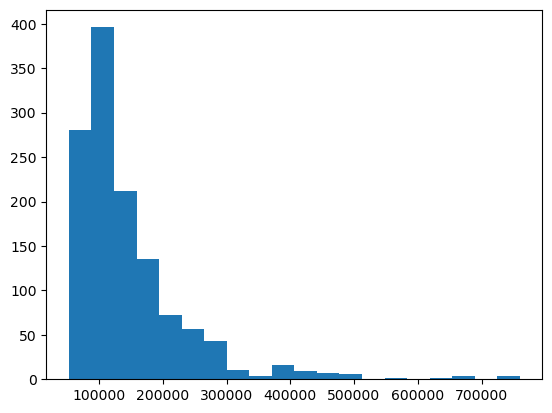

In [248]:
plt.hist(df_2n3d[df_2n3d.num_seat <= 7].price, bins = 20)

(array([270., 380., 202., 130.,  69.,  56.,  43.,  11.,   4.,  16.,   9.,
          7.,   6.,   0.,   2.,   0.,   2.,   4.,   0.,   4.]),
 array([  79200.,  132240.,  185280.,  238320.,  291360.,  344400.,
         397440.,  450480.,  503520.,  556560.,  609600.,  662640.,
         715680.,  768720.,  821760.,  874800.,  927840.,  980880.,
        1033920., 1086960., 1140000.]),
 <BarContainer object of 20 artists>)

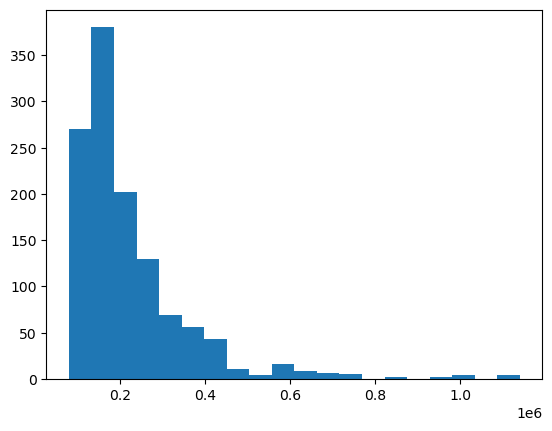

In [249]:
plt.hist(df_3n4d[df_3n4d.num_seat <= 7].price, bins = 20)

(array([260., 364., 192., 125.,  66.,  55.,  43.,  11.,   4.,  16.,   9.,
          7.,   6.,   0.,   2.,   0.,   2.,   4.,   0.,   4.]),
 array([ 105600.,  176320.,  247040.,  317760.,  388480.,  459200.,
         529920.,  600640.,  671360.,  742080.,  812800.,  883520.,
         954240., 1024960., 1095680., 1166400., 1237120., 1307840.,
        1378560., 1449280., 1520000.]),
 <BarContainer object of 20 artists>)

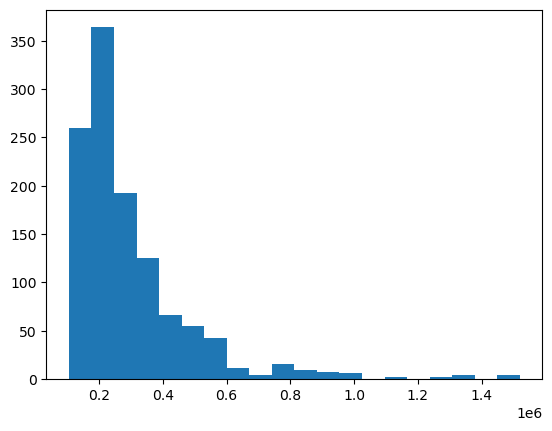

In [250]:
plt.hist(df_4n5d[df_4n5d.num_seat <= 7].price, bins = 20)

## CSV 파일 저장

In [251]:
df_2n3d.to_csv(base_path + '/db_car_2n3d.csv', index=False)
df_3n4d.to_csv(base_path + '/db_car_3n4d.csv', index=False)
df_4n5d.to_csv(base_path + '/db_car_4n5d.csv', index=False)
df_car_total.to_csv(base_path + '/db_car_total.csv', index=False)

## DB 연결

In [252]:
import psycopg2
import csv

host = 'drona.db.elephantsql.com'
user = 'bnwptvqk'
password = 'RWLldWbYTfneg_E7-NYZ0YeUH75vKq1d'
database = 'bnwptvqk'

conn = psycopg2.connect(
    host=host,
    user=user,
    password=password,
    database=database)

cur = conn.cursor()

## 2박 3일
cur.execute("DROP TABLE IF EXISTS car_2n3d;")
cur.execute("""CREATE TABLE IF NOT EXISTS car_2n3d(
                rent_date INTEGER,
                rent_day VARCHAR(200),
                return_date INTEGER,
                return_day VARCHAR(200),
                car_name VARCHAR(200),
                oiltype VARCHAR(200),
                num_seat INTEGER,
                price INTEGER,
                reserve_avail INTEGER,
                rent_period VARCHAR(200),
                img_url VARCHAR(200)
                
);""")

with open(base_path +'/db_car_2n3d.csv', 'r', newline='') as f:
    r = csv.reader(f)
    next(r)
    for row in r:
        cur.execute("""INSERT INTO car_2n3d VALUES(
                    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);""", tuple(row))
        
conn.commit()

In [ ]:
## 3박 4일
cur.execute("DROP TABLE IF EXISTS car_3n4d;")
cur.execute("""CREATE TABLE IF NOT EXISTS car_3n4d(
                rent_date INTEGER,
                rent_day VARCHAR(200),
                return_date INTEGER,
                return_day VARCHAR(200),
                car_name VARCHAR(200),
                oiltype VARCHAR(200),
                num_seat INTEGER,
                price INTEGER,
                reserve_avail INTEGER,
                rent_period VARCHAR(200),
                img_url VARCHAR(200)
                
);""")

with open(base_path +'/db_car_3n4d.csv', 'r', newline='') as f:
    r = csv.reader(f)
    next(r)
    for row in r:
        cur.execute("""INSERT INTO car_3n4d VALUES(
                    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);""", tuple(row))
        
conn.commit()

In [ ]:
## 4박 5일
cur.execute("DROP TABLE IF EXISTS car_4n4d;")
cur.execute("""CREATE TABLE IF NOT EXISTS car_4n4d(
                rent_date INTEGER,
                rent_day VARCHAR(200),
                return_date INTEGER,
                return_day VARCHAR(200),
                car_name VARCHAR(200),
                oiltype VARCHAR(200),
                num_seat INTEGER,
                price INTEGER,
                reserve_avail INTEGER,
                rent_period VARCHAR(200),
                img_url VARCHAR(200)
                
);""")

with open(base_path +'/db_car_4n5d.csv', 'r', newline='') as f:
    r = csv.reader(f)
    next(r)
    for row in r:
        cur.execute("""INSERT INTO car_4n4d VALUES(
                    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);""", tuple(row))
        
conn.commit()

In [ ]:
## 전체 데이터
conn = psycopg2.connect(
    host=host,
    user=user,
    password=password,
    database=database)

cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS car_total;")
cur.execute("""CREATE TABLE IF NOT EXISTS car_total(
                rent_date INTEGER,
                rent_day VARCHAR(200),
                return_date INTEGER,
                return_day VARCHAR(200),
                car_name VARCHAR(200),
                oiltype VARCHAR(200),
                num_seat INTEGER,
                price INTEGER,
                reserve_avail INTEGER,
                rent_period VARCHAR(200),
                img_url VARCHAR(200)
                
);""")

with open(base_path +'/db_car_total.csv', 'r', newline='') as f:
    r = csv.reader(f)
    next(r)
    for row in r:
        cur.execute("""INSERT INTO car_total VALUES(
                    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);""", tuple(row))
        
conn.commit()
conn.close()
cur.close()